<a href="https://colab.research.google.com/github/dennkitotaichi/kabuka1/blob/master/200720%E4%BD%9C%E6%88%90%E3%80%80lightGBM%E5%AE%9F%E8%A3%85%E9%83%A8%E5%88%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#you can start again from here!!!
#Call the usage list of the product code for the feature quantity！！！

import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
%matplotlib inline
import codecs

with codecs.open(r'/content/drive/My Drive/SPD_test/202006/df_f_202006.csv', "r", "Shift-JIS", "ignore") as file:
    df_f_202006_1 = pd.read_table(file, delimiter=",")
print(df_f_202006_1)


     Unnamed: 0    0    1    2    3    4  ...   42   43   44   45   46   47
0             0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
1             1  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
2             2  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
3             3  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
4             4  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
..          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
216         216  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
217         217  0.0  0.0  2.0  1.0  0.0  ...  1.0  0.0  1.0  0.0  0.0  0.0
218         218  0.0  0.0  0.0  2.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
219         219  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
220         220  0.0  0.0  2.0  1.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0

[221 rows x 49 columns]


In [3]:
#you can start again from here!!!

import codecs
import pandas as pd
with codecs.open(r"/content/drive/My Drive/SPD_test/df_h2_d.csv", "r", "Shift-JIS", "ignore") as file:
    df_h2_d = pd.read_table(file, delimiter=",")
    print(df_h2_d)

         day1  count
0    2019/6/3    1.0
1    2019/6/4    0.0
2    2019/6/5    1.0
3    2019/6/6    0.0
4    2019/6/7    0.0
..        ...    ...
216  2020/6/2    0.0
217  2020/6/3    0.0
218  2020/6/4    0.0
219  2020/6/5    0.0
220  2020/6/8    0.0

[221 rows x 2 columns]


In [5]:
import codecs
import pandas as pd
with codecs.open(r"/content/drive/My Drive/SPD_test/kanngo202006.csv", "r", "Shift-JIS", "ignore") as file:
    df = pd.read_table(file, delimiter=",")
    #print(df)


In [6]:

df_new = df.rename(columns={'Unnamed: 0': 'day1'})
df_new2 = df_new.drop(columns=['Unnamed: 1'])
df_m = pd.merge(df_h2_d, df_new2, on='day1')

In [8]:
df_m2 = pd.concat([df_m, df_f_202006_1], axis=1)


In [11]:
import pandas as pd
dt = df_m2
df = pd.DataFrame(df_m2)
dtt=df.drop(df.columns[[0]], axis=1)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set()
import collections
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers
import xgboost as xgb
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import r2_score
import random
from pandas.plotting import scatter_matrix

In [12]:
df.info()
dfs = df[df['count'] != 0]
df1 = dfs.reset_index()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 220
Columns: 171 entries, day1 to 47
dtypes: float64(129), int64(41), object(1)
memory usage: 297.0+ KB


In [13]:
#df1=df.drop(range(216,221))
df1=df
#列を取り出す方法
df2 = df1.iloc[:, 1]

In [14]:
droped_df_X_indate = df1.drop(range(216,221))
#droped_df_X = droped_df_X_indate.drop("send_date", axis=1)
#↑カラム名を指定して列を削除する方法
#↓名前の代わりに列の整数を使って削除する方法
droped_df_X = droped_df_X_indate.drop(droped_df_X_indate.columns[[1]], axis='columns')
#↓product_totalが0の行を削除する
#droped_df_X = droped_df_X1[droped_df_X1['product_total'] != 0]
print("-------------------------------------------------")
droped_df_Y1 = df1.drop(range(0,5))
droped_df_Y = droped_df_Y1['count']
print(droped_df_Y)
#Predict 5 days later

-------------------------------------------------
5      0.0
6      0.0
7      0.0
8      1.0
9      0.0
      ... 
216    0.0
217    0.0
218    0.0
219    0.0
220    0.0
Name: count, Length: 216, dtype: float64


------------------------------------------------------------
            count        評価総数           男  ...          45          46          47
count  221.000000  221.000000  221.000000  ...  221.000000  221.000000  221.000000
mean     0.266968  118.692308   57.909502  ...    0.004525    0.004525    0.004525
std      0.510120   12.868403    7.114067  ...    0.067267    0.067267    0.067267
min      0.000000   84.000000   40.000000  ...    0.000000    0.000000    0.000000
25%      0.000000  112.000000   54.000000  ...    0.000000    0.000000    0.000000
50%      0.000000  118.000000   58.000000  ...    0.000000    0.000000    0.000000
75%      0.000000  126.000000   62.000000  ...    0.000000    0.000000    0.000000
max      2.000000  161.000000   81.000000  ...    1.000000    1.000000    1.000000

[8 rows x 170 columns]
------------------------------------------------------------
X.shape (221, 169)
Create_Description_X 後の X.shape (221, 169)
Objective_variable_creationY 後の Y.shape (221,

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[159]	valid_0's l2: 0.000358121
[160]	valid_0's l2: 0.00034394
[161]	valid_0's l2: 0.00033032
[162]	valid_0's l2: 0.000317239
[163]	valid_0's l2: 0.000304676
[164]	valid_0's l2: 0.000292611
[165]	valid_0's l2: 0.000281024
[166]	valid_0's l2: 0.000269895
[167]	valid_0's l2: 0.000259207
[168]	valid_0's l2: 0.000248943
[169]	valid_0's l2: 0.000239085
[170]	valid_0's l2: 0.000229617
[171]	valid_0's l2: 0.000220524
[172]	valid_0's l2: 0.000211791
[173]	valid_0's l2: 0.000203404
[174]	valid_0's l2: 0.000195349
[175]	valid_0's l2: 0.000187614
[176]	valid_0's l2: 0.000180184
[177]	valid_0's l2: 0.000173049
[178]	valid_0's l2: 0.000166196
[179]	valid_0's l2: 0.000159615
[180]	valid_0's l2: 0.000153294
[181]	valid_0's l2: 0.000147224
[182]	valid_0's l2: 0.000141394
[183]	valid_0's l2: 0.000135794
[184]	valid_0's l2: 0.000130417
[185]	valid_0's l2: 0.000125252
[186]	valid_0's l2: 0.000120292
[187]	valid_0's l2: 0.000115529
[188]	valid_0's l2: 0.000110954
[189]	valid_0's l2: 0.00010656
[190]	valid

,importance
0,2304
1,442
2,30
3,0
4,46
...,...
164,0
165,0
166,0
167,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ここまで特徴量評価------------------------------------------------------------
light GBM
平均絶対誤差 (MAE, Mean Absolute Error
0.19101123595505617
二乗平均平方根誤差（RMSE）
0.4370483222197017
test_r2_score
0.10260972716488725


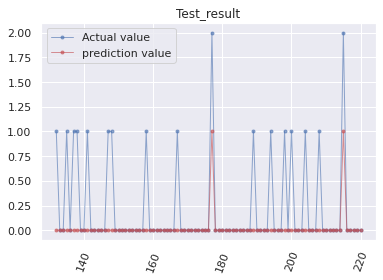

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

test_r2_score2
0.1026
他のモデルでも評価------------------------------------------------------------
決定木 sklearn_tree
平均絶対誤差 (MAE, Mean Absolute Error
0.0
二乗平均平方根誤差（RMSE）
0.0
test_r2_score
1.0


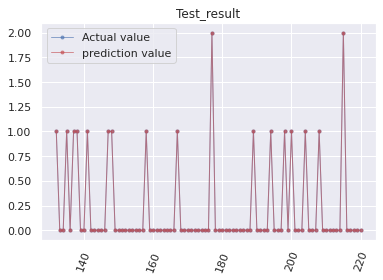

他のモデルでも評価------------------------------------------------------------
RandomForestClassifier
平均絶対誤差 (MAE, Mean Absolute Error
0.033707865168539325
二乗平均平方根誤差（RMSE）
0.2370227315699886
test_r2_score
0.736061684460261


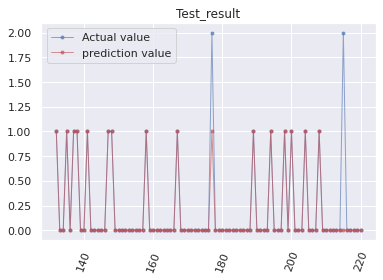

他のモデルでも評価------------------------------------------------------------
XGBoost accuracy_score
平均絶対誤差 (MAE, Mean Absolute Error
0.0
二乗平均平方根誤差（RMSE）
0.0
test_r2_score
1.0


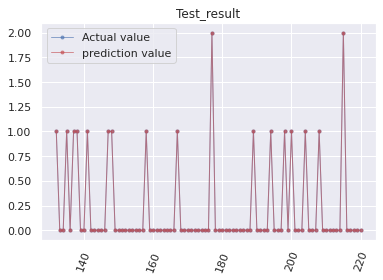

In [15]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm  
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.metrics import r2_score
print("------------------------------------------------------------")

#5_days_predict
print(dt.describe())

print("------------------------------------------------------------")

#説明変数入力用ここをうまく少ないソースコードで取得できる方法を考案
def Create_Description_X(df):
 train_data = dt.values
 X = train_data[:, 2:] # 3列目以降の変数
 y  = train_data[:, 1]  # 正解データを2列目に置きましたそしてyとしました

 
 #説明変数作成

 print("X.shape",X.shape)
 return X

#説明変数Create_Description_X実施これでXに値が入るはず
X = Create_Description_X(dt)
print("Create_Description_X 後の X.shape",X.shape)

#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = dt['count'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)

print("Objective_variable_creationY 後の Y.shape",Y.shape)

# 訓練用のデータと、テスト用のデータに分ける関数
def Test_data_and_training_data_split(df,X,Y):
 N_train = int(len(df) * 0.60)
 N_test = len(df) - N_train
 X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=N_test,shuffle=False) 
 return X_train, X_test, y_train, y_test

# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)

print("X_train",X_train.shape)
print("Y_train",y_train.shape)
print("X_test",X_test.shape)
print("Y_test",y_test.shape)

print("------------------------------------------------------------")

print("ここから特徴量評価------------------------------------------------------------")

#light GBM関数
def Test_lightgbm(X_train, X_test, y_train, y_test):
 import lightgbm as lgb
 # データを格納する
 lgb_train = lgb.Dataset(X_train, y_train)
 lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
 # 学習条件を設定
 params = {'task': 'train',
          'metric':{'l2'},
          'boosting_type': 'gbdt',
          'learning_rate': 0.02,
          'num_leaves': 23,
          'min_data_in_leaf': 1,
          'num_iteration': 1000,
          'verbose': 0,
          }

 # 学習する
 model = lgb.train(params,
                  lgb_train,
                  num_boost_round=50,
                  valid_sets=lgb_eval,
                  early_stopping_rounds=100)

 # テストデータで予測する
 y_pred = model.predict(X_test, num_iteration=model.best_iteration)
 y_pred_max = np.argmax(y_pred)

 # Accuracy を計算する
 accuracy = sum(y_test == y_pred_max) / len(y_test)
 print('accuracy:', accuracy)
 
 # importanceを表示する
 importance = pd.DataFrame(model.feature_importance(), columns=['importance'])
 display(importance)
 #np.set_printoptions(threshold=np.inf)
 #print(importance)
 # テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
 df_corr = importance
 from google.colab import files
 writer = pd.ExcelWriter('importance.xlsx')
 df_corr.to_excel(writer)
 writer.save()
 files.download('importance.xlsx')


 Y_pred = model.predict(X_test)
 return Y_pred

#Test_lightgbm関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)



print("ここまで特徴量評価------------------------------------------------------------")

# テスト結果を評価する,Test_result()関数
def Test_result(Y_pred, y_test):
 from sklearn.model_selection import cross_val_score
 from sklearn.linear_model import LogisticRegression
 from sklearn import svm  
 from sklearn.metrics import accuracy_score
 import lightgbm as lgb
 from sklearn.metrics import r2_score
 print("light GBM") 
 # テスト結果を評価する,accuracy_score()
 #print("予測対象X：", y_test, ", 予測結果→", Y_pred)
 from sklearn.metrics import mean_absolute_error
 print("平均絶対誤差 (MAE, Mean Absolute Error") 
 print(mean_absolute_error(y_test, Y_pred))
 ## RMSEの計算
 print("二乗平均平方根誤差（RMSE）")
 print(np.sqrt(mean_squared_error(y_test,Y_pred)))
 ## test_r2_score計算
 test_r2_score = r2_score(y_test,Y_pred)
 print("test_r2_score")
 print(test_r2_score)
 ## 予測結果をプロット
 pre_date = df.index[-len(y_test):].values
 plt.title("Test_result")
 plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="Actual value", linewidth=1)
 plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="prediction value", linewidth=1)
 plt.xticks(rotation=70)
 plt.legend()
 plt.grid(True)
 plt.show()

 test_r2_score1 = test_r2_score
 test_r2_score2 = test_r2_score1.astype("float16")
 Y_pred2 = Y_pred.astype("int")
 df_cor = pd.DataFrame({'test_r2_score': [test_r2_score2],
                   '平均絶対誤差 (MAE, Mean Absolute Error': [mean_absolute_error(y_test, Y_pred)],
                   '二乗平均平方根誤差（RMSE）': [mean_absolute_error(y_test, Y_pred)],
                   'Y_pred': [Y_pred2[0], Y_pred2[1], Y_pred2[2], Y_pred2[3], Y_pred2[4],Y_pred2[5]]},index=['1_day_later', '2_day_later', '3_day_later', '4_day_later', '5_day_later','6_day_later'])
                    

 #pandasにしないと以下が実行できない

 from google.colab import files
 writer = pd.ExcelWriter('test_r2_score.xlsx')
 df_cor.to_excel(writer)
 writer.save()
 files.download('test_r2_score.xlsx')

 print("test_r2_score2")
 print(test_r2_score2)


#整数に直してから評価する
Y_pred2 = Y_pred.astype("int")

#Test_result関数の実施
Test_result(Y_pred2, y_test)


print("他のモデルでも評価------------------------------------------------------------")


#決定木関数の作成
def sklearn_tree_test_result(X_train, X_test, y_train, y_test):
 from sklearn.tree import DecisionTreeClassifier 
 dt = DecisionTreeClassifier()
 dt.fit(X_train,y_train)
 y_pred = dt.predict(X_test)
 #整数に直してから評価する
 y_pred2 = y_pred.astype("int")
 #print("決定木accuracy_score : {}".format(accuracy_score(y_test,y_pred)))
 print("決定木 sklearn_tree") 
 ## 平均絶対誤差の計算
 from sklearn.metrics import mean_absolute_error
 print("平均絶対誤差 (MAE, Mean Absolute Error") 
 print(mean_absolute_error(y_test, y_pred2))
 ## RMSEの計算
 print("二乗平均平方根誤差（RMSE）")
 print(np.sqrt(mean_squared_error(y_test,y_pred2)))
 ## test_r2_score計算
 test_r2_score = r2_score(y_test,y_pred2)
 print("test_r2_score")
 print(test_r2_score)
 ## 予測結果をプロット
 pre_date = df.index[-len(y_test):].values
 plt.title("Test_result")
 plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="Actual value", linewidth=1)
 plt.plot(pre_date, y_pred2, 'r', alpha=0.6, marker='.', label="prediction value", linewidth=1)
 plt.xticks(rotation=70)
 plt.legend()
 plt.grid(True)
 plt.show()


#決定木関数の実行
sklearn_tree_test_result(X_train, X_test, y_train, y_test)

print("他のモデルでも評価------------------------------------------------------------")
 
#ランダムフォレスト関数の作成
def RandomForestClassifier_test_result(X_train, X_test, y_train, y_test):
 from sklearn.ensemble import RandomForestClassifier
 rf = RandomForestClassifier()
 rf.fit(X_train,y_train)
 y_pred_pre = rf.predict(X_test)
 #整数に変換
 y_pred = y_pred_pre.astype("int")
 print("RandomForestClassifier")
 ## 平均絶対誤差の計算
 from sklearn.metrics import mean_absolute_error
 print("平均絶対誤差 (MAE, Mean Absolute Error") 
 print(mean_absolute_error(y_test, y_pred))
 ## RMSEの計算
 print("二乗平均平方根誤差（RMSE）")
 print(np.sqrt(mean_squared_error(y_test,y_pred)))
 ## test_r2_score計算
 test_r2_score = r2_score(y_test,y_pred)
 print("test_r2_score")
 print(test_r2_score)
 ## 予測結果をプロット
 pre_date = df.index[-len(y_test):].values
 plt.title("Test_result")
 plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="Actual value", linewidth=1)
 plt.plot(pre_date, y_pred, 'r', alpha=0.6, marker='.', label="prediction value", linewidth=1)
 plt.xticks(rotation=70)
 plt.legend()
 plt.grid(True)
 plt.show()

#ランダムフォレスト関数の実行
RandomForestClassifier_test_result(X_train, X_test, y_train, y_test)

print("他のモデルでも評価------------------------------------------------------------")

#XGBoost関数の作成
def XGBoost_test_result(X_train, X_test, y_train, y_test):
 import xgboost as xgb
 from xgboost import XGBClassifier
 xgb = xgb.XGBClassifier(booster="gbtree",silent=0,seed=2019)
 xgb.fit(X_train,y_train)
 y_pred_pre = xgb.predict(X_test)
 #整数に変換
 y_pred = y_pred_pre.astype("int")
 print("XGBoost accuracy_score")
 ## 平均絶対誤差の計算
 from sklearn.metrics import mean_absolute_error
 print("平均絶対誤差 (MAE, Mean Absolute Error") 
 print(mean_absolute_error(y_test, y_pred))
 ## RMSEの計算
 print("二乗平均平方根誤差（RMSE）")
 print(np.sqrt(mean_squared_error(y_test,y_pred)))
 ## test_r2_score計算
 test_r2_score = r2_score(y_test,y_pred)
 print("test_r2_score")
 print(test_r2_score)
 ## 予測結果をプロット
 pre_date = df.index[-len(y_test):].values
 plt.title("Test_result")
 plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="Actual value", linewidth=1)
 plt.plot(pre_date, y_pred, 'r', alpha=0.6, marker='.', label="prediction value", linewidth=1)
 plt.xticks(rotation=70)
 plt.legend()
 plt.grid(True)
 plt.show()

XGBoost_test_result(X_train, X_test, y_train, y_test)
